In [1]:
from rxntools.reaction import ChemicalReaction
from rxntools.template import ReactionTemplate
import rdkit.Chem.AllChem as Chem
from itertools import permutations

In [2]:
# example reaction smarts input
rs = 'CCN(CC)CC.CC(C)=O.[CH3:18][CH:17]([CH3:19])[CH:14]1[CH2:15][CH2:16][CH:11]([CH3:23])[CH2:12][CH:13]1[O:20][CH2:21]Cl.[O:7]=[C:6]([OH:8])[c:5]1[cH:4][cH:3][c:2]([OH:1])[cH:10][cH:9]1>O.CCOC(C)=O>[CH3:18][CH:17]([CH3:19])[C@@H:14]1[CH2:15][CH2:16][C@@H:11]([CH3:23])[CH2:12][C@H:13]1[O:20][CH2:21][O:8][C:6](=[O:7])[c:5]1[cH:4][cH:3][c:2]([OH:1])[cH:10][cH:9]1'

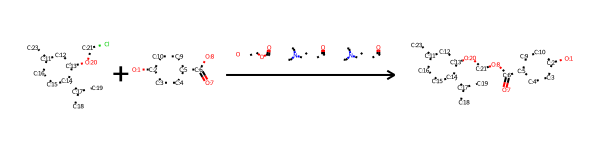

In [3]:
# read reaction smarts
cr = ChemicalReaction(rs)
cr.rxn

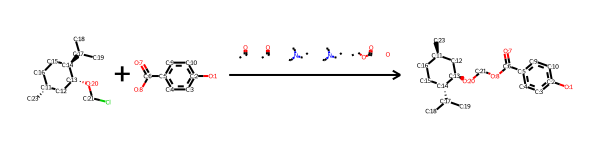

In [4]:
# Complete missing chiral information.
new_cr = cr.FixChiralityInfo('complete')
# new_cr = cr.FixChiralityInfo('delete')
new_cr.rxn

In [5]:
# extract reaction template smarts
template_smarts = new_cr.ExtractTemplate()

In [6]:
template = ReactionTemplate(template_smarts)
print(template_smarts)

([C;H0;+0:1](-[c:2])(=[O;D1;H0:4])-[O;H1;+0:6]).([Cl;D1;H0]-[C;H2;+0:3]-[#8:5])>>([C;H0;+0:1](-[c:2])(=[O;D1;H0:4])-[O;H0;+0:6]-[C;H2;+0:3]-[#8:5])


In [7]:
# get reactants
reactants = list(map(lambda x: Chem.MolFromSmiles(Chem.MolToSmiles(x)), new_cr.reactants))
r1, r2 = reactants

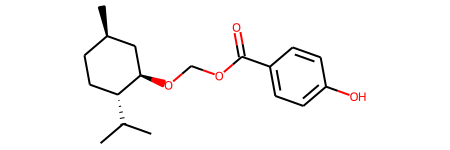

In [8]:
# get products by applying the template on reactants
template.rxn.RunReactants([r2, r1])[0][0]